## Observations and Insights 

In [388]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merge = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
data_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [389]:
# Checking the number of mice.
len(data_merge['Mouse ID'].unique())

249

In [390]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

duplciate = data_merge.loc[data_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplciate

array(['g989'], dtype=object)

In [391]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = data_merge[data_merge['Mouse ID'].isin(duplciate)==False]
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [392]:
# Checking the number of mice in the clean DataFrame.
len(new_data['Mouse ID'].unique())

248

## Summary Statistics

In [393]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean = new_data.groupby('Drug Regimen').mean()['Tumour Volume (mm3)']
median =  new_data.groupby('Drug Regimen').median()['Tumour Volume (mm3)']
var = new_data.groupby('Drug Regimen').var()['Tumour Volume (mm3)']
std_var = new_data.groupby('Drug Regimen').std()['Tumour Volume (mm3)']
sem = new_data.groupby('Drug Regimen').sem()['Tumour Volume (mm3)']



In [394]:
summary = pd.DataFrame({"Mean": mean,'Median': median,'Variance' : var, 'Standard Deviation' : std_var, 'SEM' : sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [395]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = new_data.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumour Volume (mm3)']
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


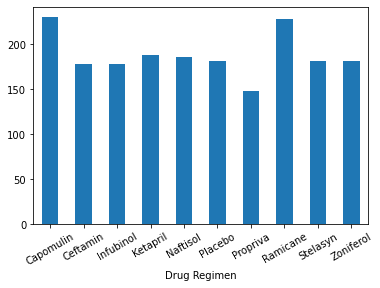

In [396]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
new_data.groupby('Drug Regimen').count()['Timepoint'].plot.bar (x='Drug Regimen', y='Timepoint', rot = 30)


Text(0, 0.5, 'Timepoints count')

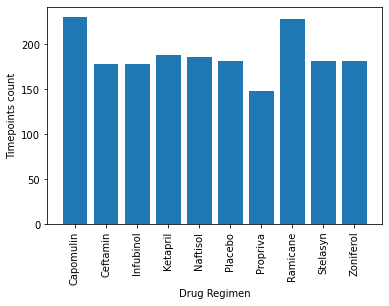

In [397]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(new_data.groupby('Drug Regimen')["Timepoint"].count().index,new_data.groupby('Drug Regimen')["Timepoint"].count())
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.ylabel("Timepoints count")

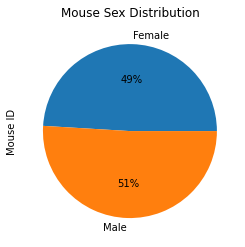

In [398]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

new_data.groupby('Sex').count()["Mouse ID"].plot.pie( y='Sex',title = 'Mouse Sex Distribution',autopct='%1.0f%%')


Text(0.5, 1.0, 'Mouse Sex distribution')

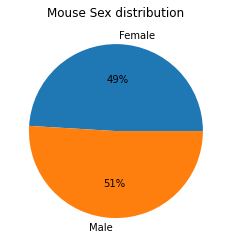

In [399]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(new_data.groupby("Sex").count()["Mouse ID"],labels=new_data.groupby("Sex").count().index,autopct='%1.0f%%')
plt.title("Mouse Sex distribution")


## Quartiles, Outliers and Boxplots

In [400]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = new_data.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

new_data_2 = pd.merge(new_data, last_timepoint, how='left', on=['Mouse ID','Mouse ID'])
new_data_2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumour Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [401]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
turmour_vol_list = []
for drug in treatments:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    final_tumor_vol = new_data_2.loc[new_data_2["Drug Regimen"] == drug, 'Tumour Volume (mm3)']

    
    # add subset 
    turmour_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]    

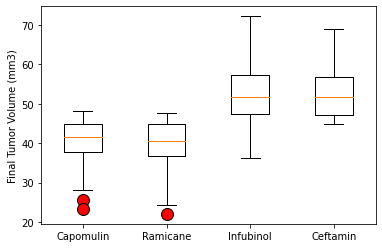

In [402]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(turmour_vol_list, labels = treatments,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

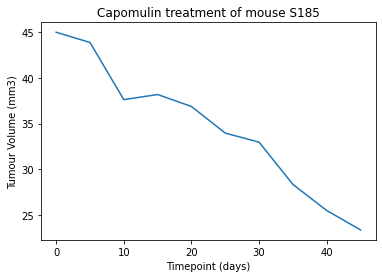

In [403]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_table = new_data_2.loc[new_data_2['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint_x'],mousedata['Tumour Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Capomulin treatment of mouse S185')
plt.show()

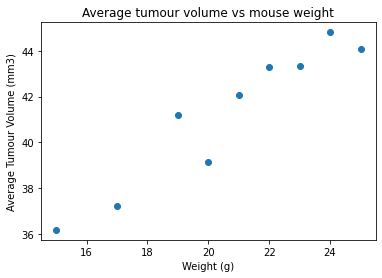

In [404]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_table = new_data_2.loc[new_data_2['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Weight (g)']).mean()
plt.scatter(capomulin_average.index,capomulin_average['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title('Average tumour volume vs mouse weight')
plt.show()


## Correlation and Regression

In [405]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
df_corr=capomulin_average.reset_index()[["Weight (g)","Tumour Volume (mm3)"]]
correlation_coefficient=df_corr.corr(method='pearson', min_periods=1)["Weight (g)"]["Tumour Volume (mm3)"].round(4)

slope=st.linregress(df_corr["Weight (g)"],df_corr["Tumour Volume (mm3)"]).slope
intercept=st.linregress(df_corr["Weight (g)"],df_corr["Tumour Volume (mm3)"]).intercept

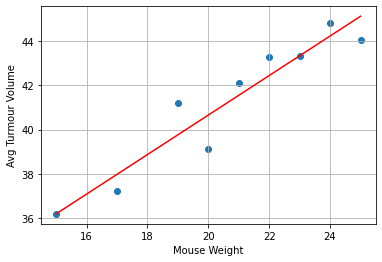

In [406]:
x = np.linspace(df_corr["Weight (g)"].min(),df_corr["Weight (g)"].max(),100)
y = slope*x+intercept
plt.plot(x, y, '-r', label="base line")
# plt.title('Graph of y=2x+1')
plt.scatter(df_corr["Weight (g)"],df_corr["Tumour Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Turmour Volume")
plt.grid()
plt.show()